In [50]:
#Librerias a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
#Importación de base de datos al código

In [3]:
df = pd.read_csv("movies.csv")

# 1. Variable de interés y su explicación

In [4]:
#Primeros 5 registros de la base de datos y sus respectivas variables:

In [5]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
#Conclusiones:
#La variable de interés a pronosticar es "gross", lo que se traduce al monto en USD generado de la pelicula registrada.
#Con este proyecto se busca generar un modelo de regresión simple en el cual se pueda pronosticar cuanto dinero generará una pelicula basado en sus demás variables.

# 2. Información de variables

In [7]:
#Número de registros con información que tiene cada variable

In [8]:
df.count()

name        7668
rating      7591
genre       7668
year        7668
score       7665
votes       7665
director    7668
writer      7665
star        7667
country     7665
budget      5497
gross       7479
company     7651
runtime     7664
dtype: int64

In [9]:
#Tipo de variable de cada variable

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#Registros en blanco de cada variable

In [12]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [13]:
#Eliminación de registros en blanco (no son relevantes para el análisis):

In [14]:
dflimpio = df.dropna()

In [15]:
#Nuevo conteo de registros en blanco, ahora la base de datos está LIMPIA.

In [16]:
dflimpio.isna().sum()

name        0
rating      0
genre       0
year        0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
#Nuevo número de registros de cada variable, notese que ahora todos los valores son iguales.

In [18]:
dflimpio.count()

name        5421
rating      5421
genre       5421
year        5421
score       5421
votes       5421
director    5421
writer      5421
star        5421
country     5421
budget      5421
gross       5421
company     5421
runtime     5421
dtype: int64

In [19]:
#Conclusiones:
#Se puede observar que existen 14 variables diferentes dentro de la base de datos, de las cuales 5 son tipo flotante (incluyen decimales), 1 es tipo integer y 8 son variables categóricas (object).
#Se tuvo que limpiar la base de datos ya que se encontraban registros en blanco en algunas de las variables.
#Al limpiarse los datos se cuenta con 5421 registros de cada variable.
#Tenemos diferentes variables de tipo float e integer por lo que se deberá de realizar una prueba de correlación para ver cual tiene una mayor relación con la variable de interés (gross).

# 3. ¿Qué distribución sigue la variable de interés?

In [20]:
df.describe(include=[np.number])

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [21]:
#Conclusiones
#La variable de interés "gross" no tiene un rango establecido ni es limitada, por lo que se define que sus valores pueden variar entre cualquier número positivo.

# 4. ¿Qué tipo de distribución sigue la variable de interés?

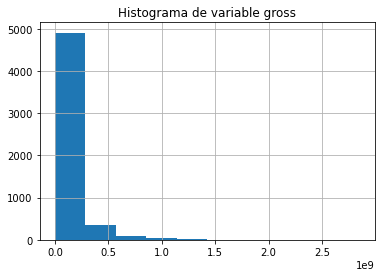

In [22]:
plt.title('Histograma de variable gross')
plt.hist(dflimpio['gross'])
plt.grid(True)
plt.show()

In [23]:
#Conclusiones:
#Se presenta un gran sesgo hacia la derecha, esto se debe a que la mayoría de las películas tienen un presupuesto entre 0.0 y 0.5 x10^9, con algunas excepciones lleganod hasta 2.5x10^9.
#Esto no representa algún problema, ya que es normal debido a que existen algunas superproductoras dentro de la base de datos (Disney, Warner Bros, etc.) lo cual hace que el histograma se vea afectado ya que son una muy pequeña parte del total de registros.

# 5. Variable de mayor correlación

In [24]:
dflimpio.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [25]:
#Conclusiones:
#Se observa que para la variable gross (variable de interés) se tiene una mayor correlación con budget (corr = 0.74), lo cual de igual forma hace sentido lógico, ya que mientras más se invierta en la producción de una película, más se espera que genere de ingresos.
#Se construiría una función de la siguiente manera para el pronostico: gross = B0 + B1 * budget

# 6. Correlación entre variable dependiente e independiente

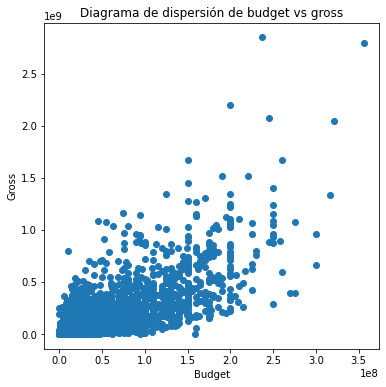

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(x = dflimpio['budget'], y = dflimpio['gross'])
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.title("Diagrama de dispersión de budget vs gross")
plt.show()

In [27]:
#Conclusiones:
#Se observa que existe una tendencia creciente entre las variables, por lo que es una correlación positiva. Esto significa que mientras más alto sea el presupuesto de una película más alto serán los ingresos que se generen de la misma.

# 7. Valores atípicos budget

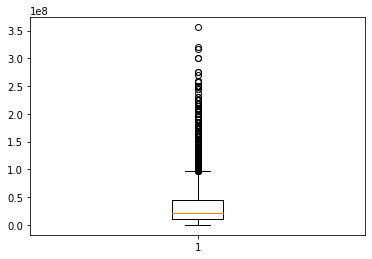

In [28]:
plt.boxplot(dflimpio['budget'])
plt.show()

In [29]:
#Conclusiones:
#Se observa que existen una gran cantidad de valores atípicos, sin embargo, al considerar que esta base de datos contiene miles de registros de información de peliculas, tomando en cuenta que son de diferentes países y de diferentes productoras, tiene sentido que se tenga un gran rango de presupuestos.
#Además, al sumarle que se obtuvo un valor alto de correlación con la variable se descartan estos valores como atípicos.

# 8. Análisis de regresión

In [30]:
#Correlación de un 74.03%, buena medición, se procede con el análisis

In [31]:
budgetgross = dflimpio[['budget','gross']]

model_ols = sm.OLS.from_formula("gross ~ budget", data=budgetgross)

result = model_ols.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     6569.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:43:11   Log-Likelihood:            -1.0880e+05
No. Observations:                5421   AIC:                         2.176e+05
Df Residuals:                    5419   BIC:                         2.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.686e+07   2.26e+06     -7.452      0.0

In [32]:
#Conclusiones:
#Se observa dentro del análisis de regresión que los parámetros B0 Y B1 son significativos, pues ambos son menores al alfa establecido (0.05), por lo que el modelo indica a ser preciso.
#La R cuadrada de igual forma no es ideal, cercana al 55% de aceptación, por lo que se puede considerar aceptable para el modelo.
#En cuanto al Durbin-Watson, se tiene un valor un poco menor a 2, lo cual es ideal ya que define que hay evidencia de correlación serial positiva.
#En general con este análisis se puede observar que el modelo de predicción es bueno para la variable gross.

# 9. Grafica de dispersión de observaciones y predicción.

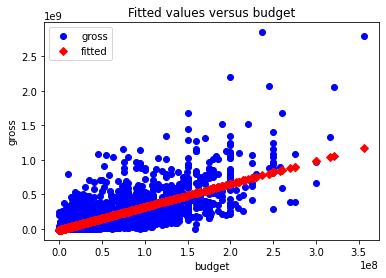

In [33]:
sm.graphics.plot_fit(result,1, vlines=False);

In [34]:
#Conclusiones:
#Se vuelve a graficar la dispersión entre la variable gross y budget, pero ahora agregando la predicción generada por el modelo siguiendo la formula: -16860000 + 3.3351*budget
#Se observa en la gráfica que la predicción sigue la tendencia creciente de la gráfica de dispersión anterior, por lo que se puede utilizar este modelo para predicciones de generación de dinero de una película (gross) basandose en su presupuesto (budget).